In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### DECISION TREE CLASS CREATION

-----


In [39]:
class Decision_Tree():


    def __init__(self, dataframe, response_variable):

        self.dataframe = dataframe
        self.response_variable = response_variable


    def _print_tree(self, the_tree):

        plt.figure(figsize = (40, 20))
        tree.plot_tree(the_tree, feature_names = self.feat_names, filled = True)
        plt.show()


    def fit_model(self):

        X = self.dataframe.drop(self.response_variable, axis = 1)
        y = self.dataframe[self.response_variable]

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

        my_tree = DecisionTreeClassifier(random_state =0)

        my_tree.fit(self.x_train, self.y_train)
        
        self.feat_names = list(self.x_train.columns)

        self._print_tree(my_tree)

        self.y_pred_test = my_tree.predict(self.x_test)
        self.y_pred_train = my_tree.predict(self.x_train)

        dicc_params = {'max_features': np.sqrt(len(self.x_train.columns)), 'max_depth': my_tree.tree_.max_depth}

        return dicc_params
    

    def get_metrics(self, model_name):
        
        accuracy_test = accuracy_score(self.y_test, self.y_pred_test)
        precision_test = precision_score(self.y_test, self.y_pred_test)
        recall_test = recall_score(self.y_test, self.y_pred_test)
        f1_test = f1_score(self.y_test, self.y_pred_test)
        kappa_test = cohen_kappa_score(self.y_test, self.y_pred_test)

        accuracy_train = accuracy_score(self.y_train, self.y_pred_train)
        precision_train = precision_score(self.y_train, self.y_pred_train)
        recall_train = recall_score(self.y_train, self.y_pred_train)
        f1_train = f1_score(self.y_train, self.y_pred_train)
        kappa_train = cohen_kappa_score(self.y_train, self.y_pred_train)
            
        dataframe = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                            'precision': [precision_test, precision_train],
                            'recall': [recall_test, recall_train], 
                            'f1': [f1_test, f1_train],
                            'kappa': [kappa_test, kappa_train],
                            'set': ['test', 'train']})
        
        dataframe['model'] = model_name

        return dataframe
    

    def define_best_model(self, parameters):

        grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state= 42), param_grid= parameters, cv=10, verbose= False) 

        grid_search.fit(self.x_train, self.y_train)

        self.best_tree = grid_search.best_estimator_

        self._print_tree(self.best_tree)

        return self.best_tree


    def apply_best_model(self, model_name):

        self.y_pred_test = self.best_tree.predict(self.x_test)
        self.y_pred_train = self.best_tree.predict(self.x_train)

        best_results_dataframe = self.metrics(model_name)

        return best_results_dataframe 


### DECISION TREE ON RANDOM_OVER_SAMPLE DATAFRAME

-----


In [40]:
df_over = pd.read_pickle('../data/cardio_processed_over.pkl')
df_over.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,...,glucose,education_1.0,education_2.0,education_3.0,education_4.0,is_smoking_NO,is_smoking_YES,sex_F,sex_M,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,...,0.142857,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,...,-0.214286,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,...,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,...,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,...,-0.071429,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [41]:
response_var = 'TenYearCHD'

In [42]:
decision_tree_over = Decision_Tree(df_over, response_var)

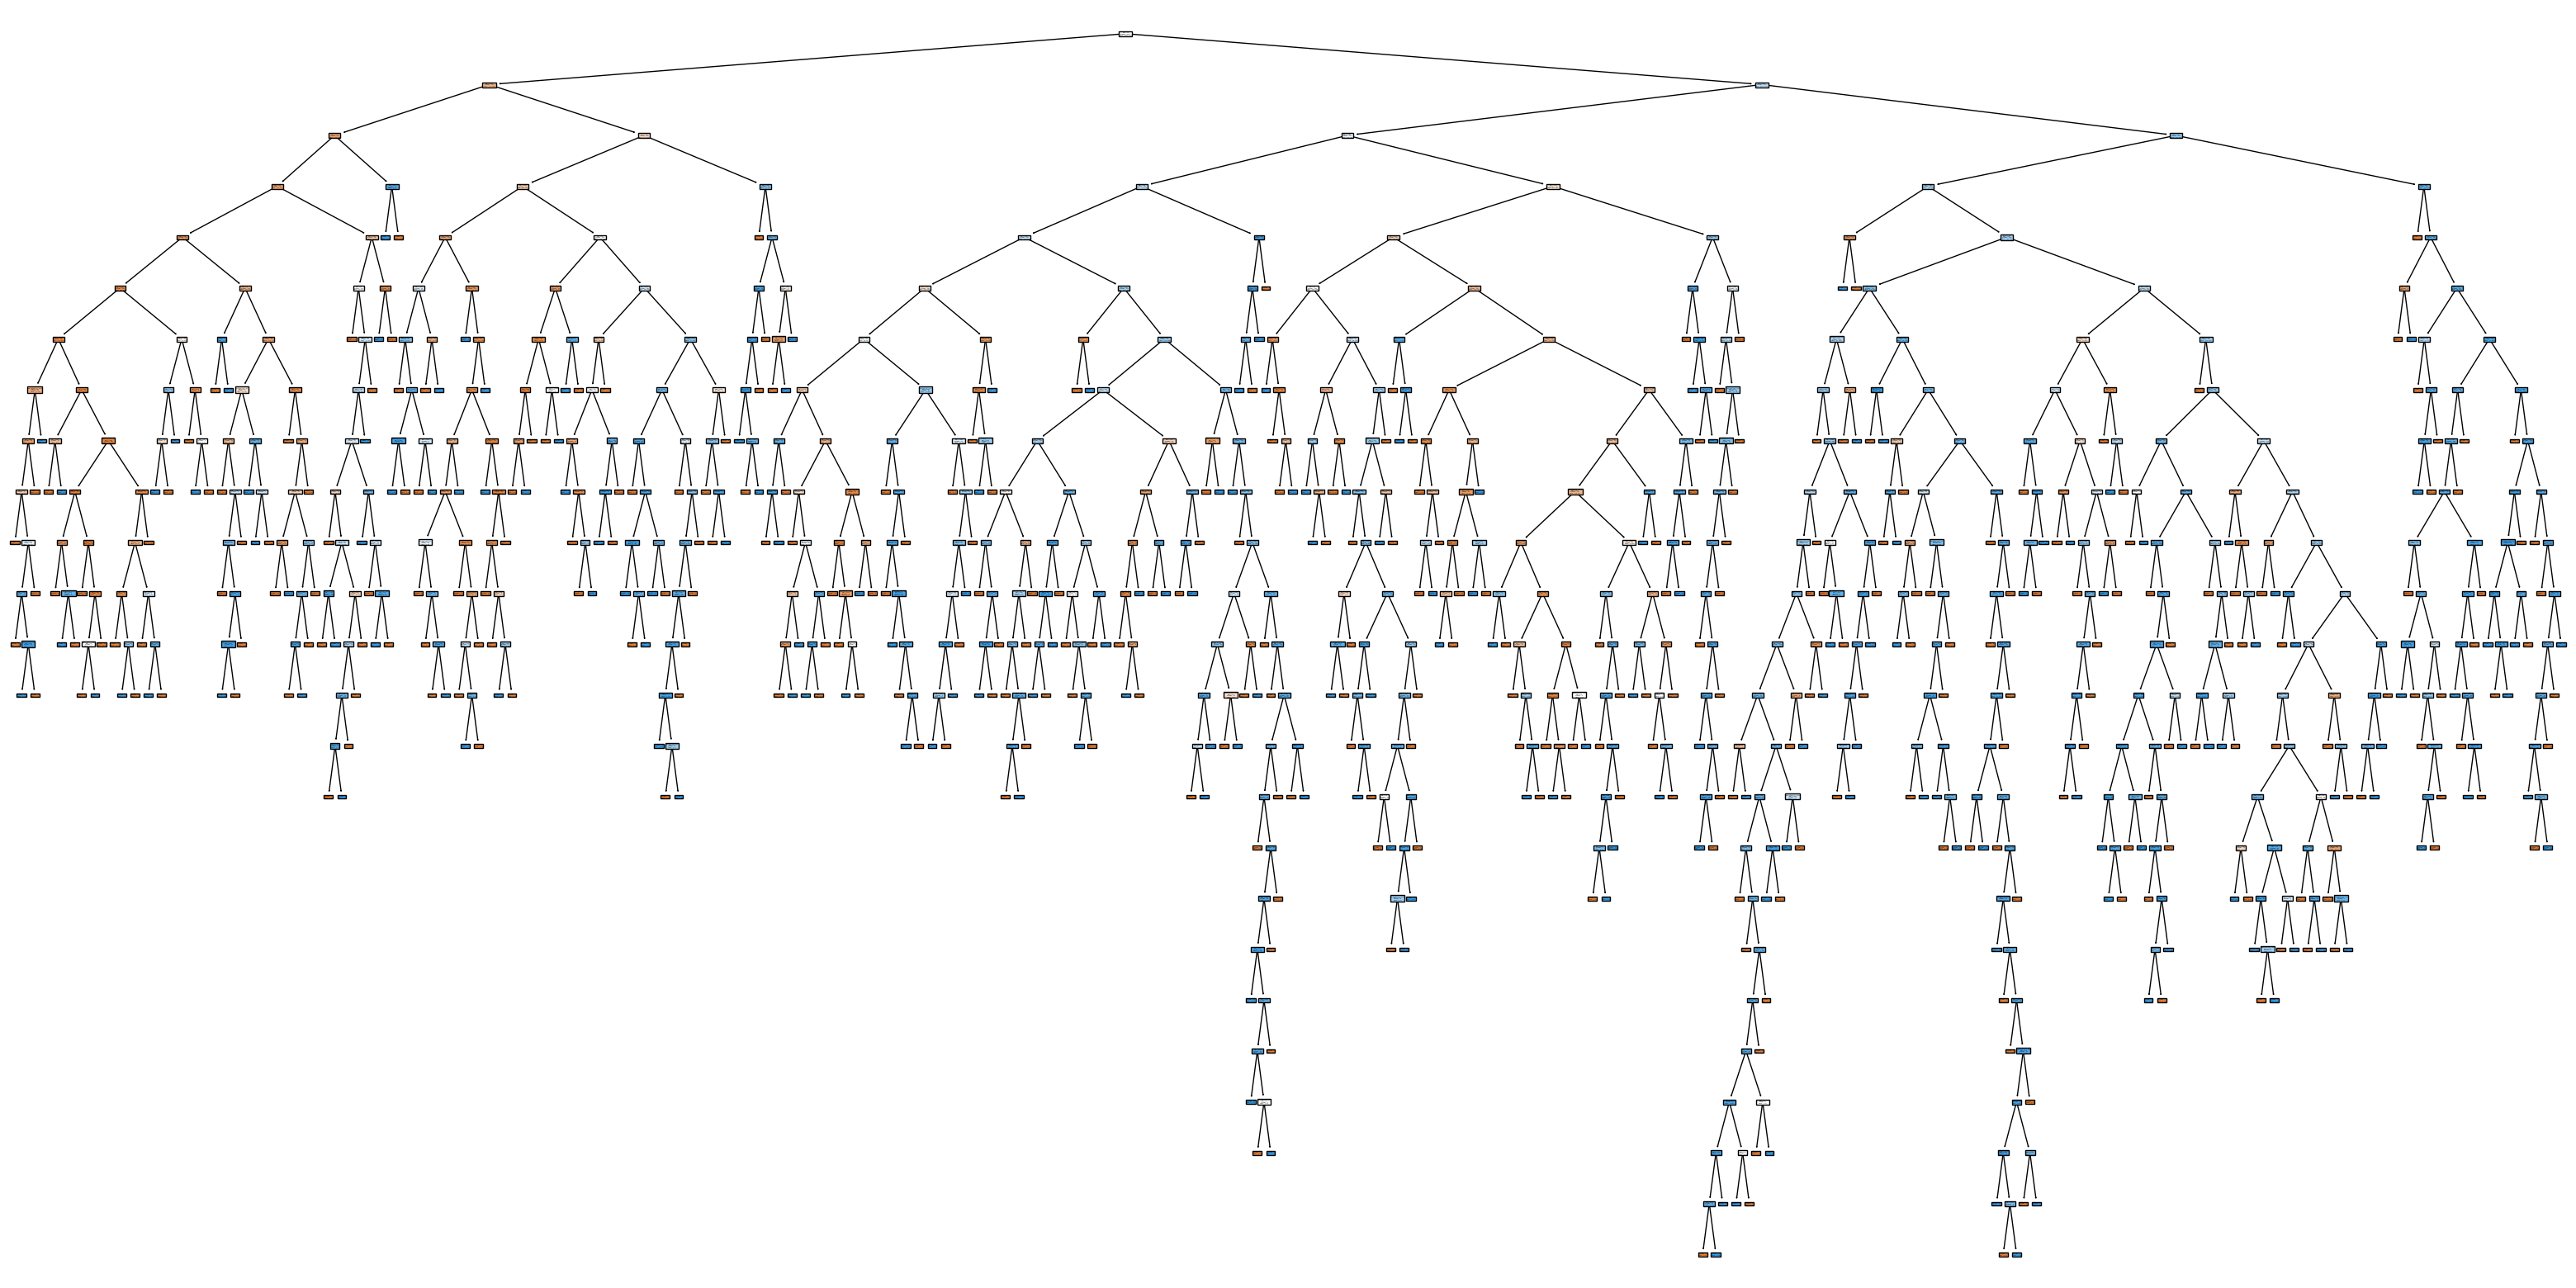

{'max_features': 4.58257569495584, 'max_depth': 24}

In [43]:
decision_tree_over.fit_model()

In [44]:
decision_tree_over.get_metrics('OVER Decision Tree')

,accuracy,precision,recall,f1,kappa,set,model
0,0.900463,0.832341,0.996437,0.907027,0.801767,test,OVER Decision Tree
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,OVER Decision Tree


In [45]:
param_over = {"max_depth": [9, 10, 11, 12], 
        "max_features": [2, 3, 4, 5],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [10, 20, 50]} 

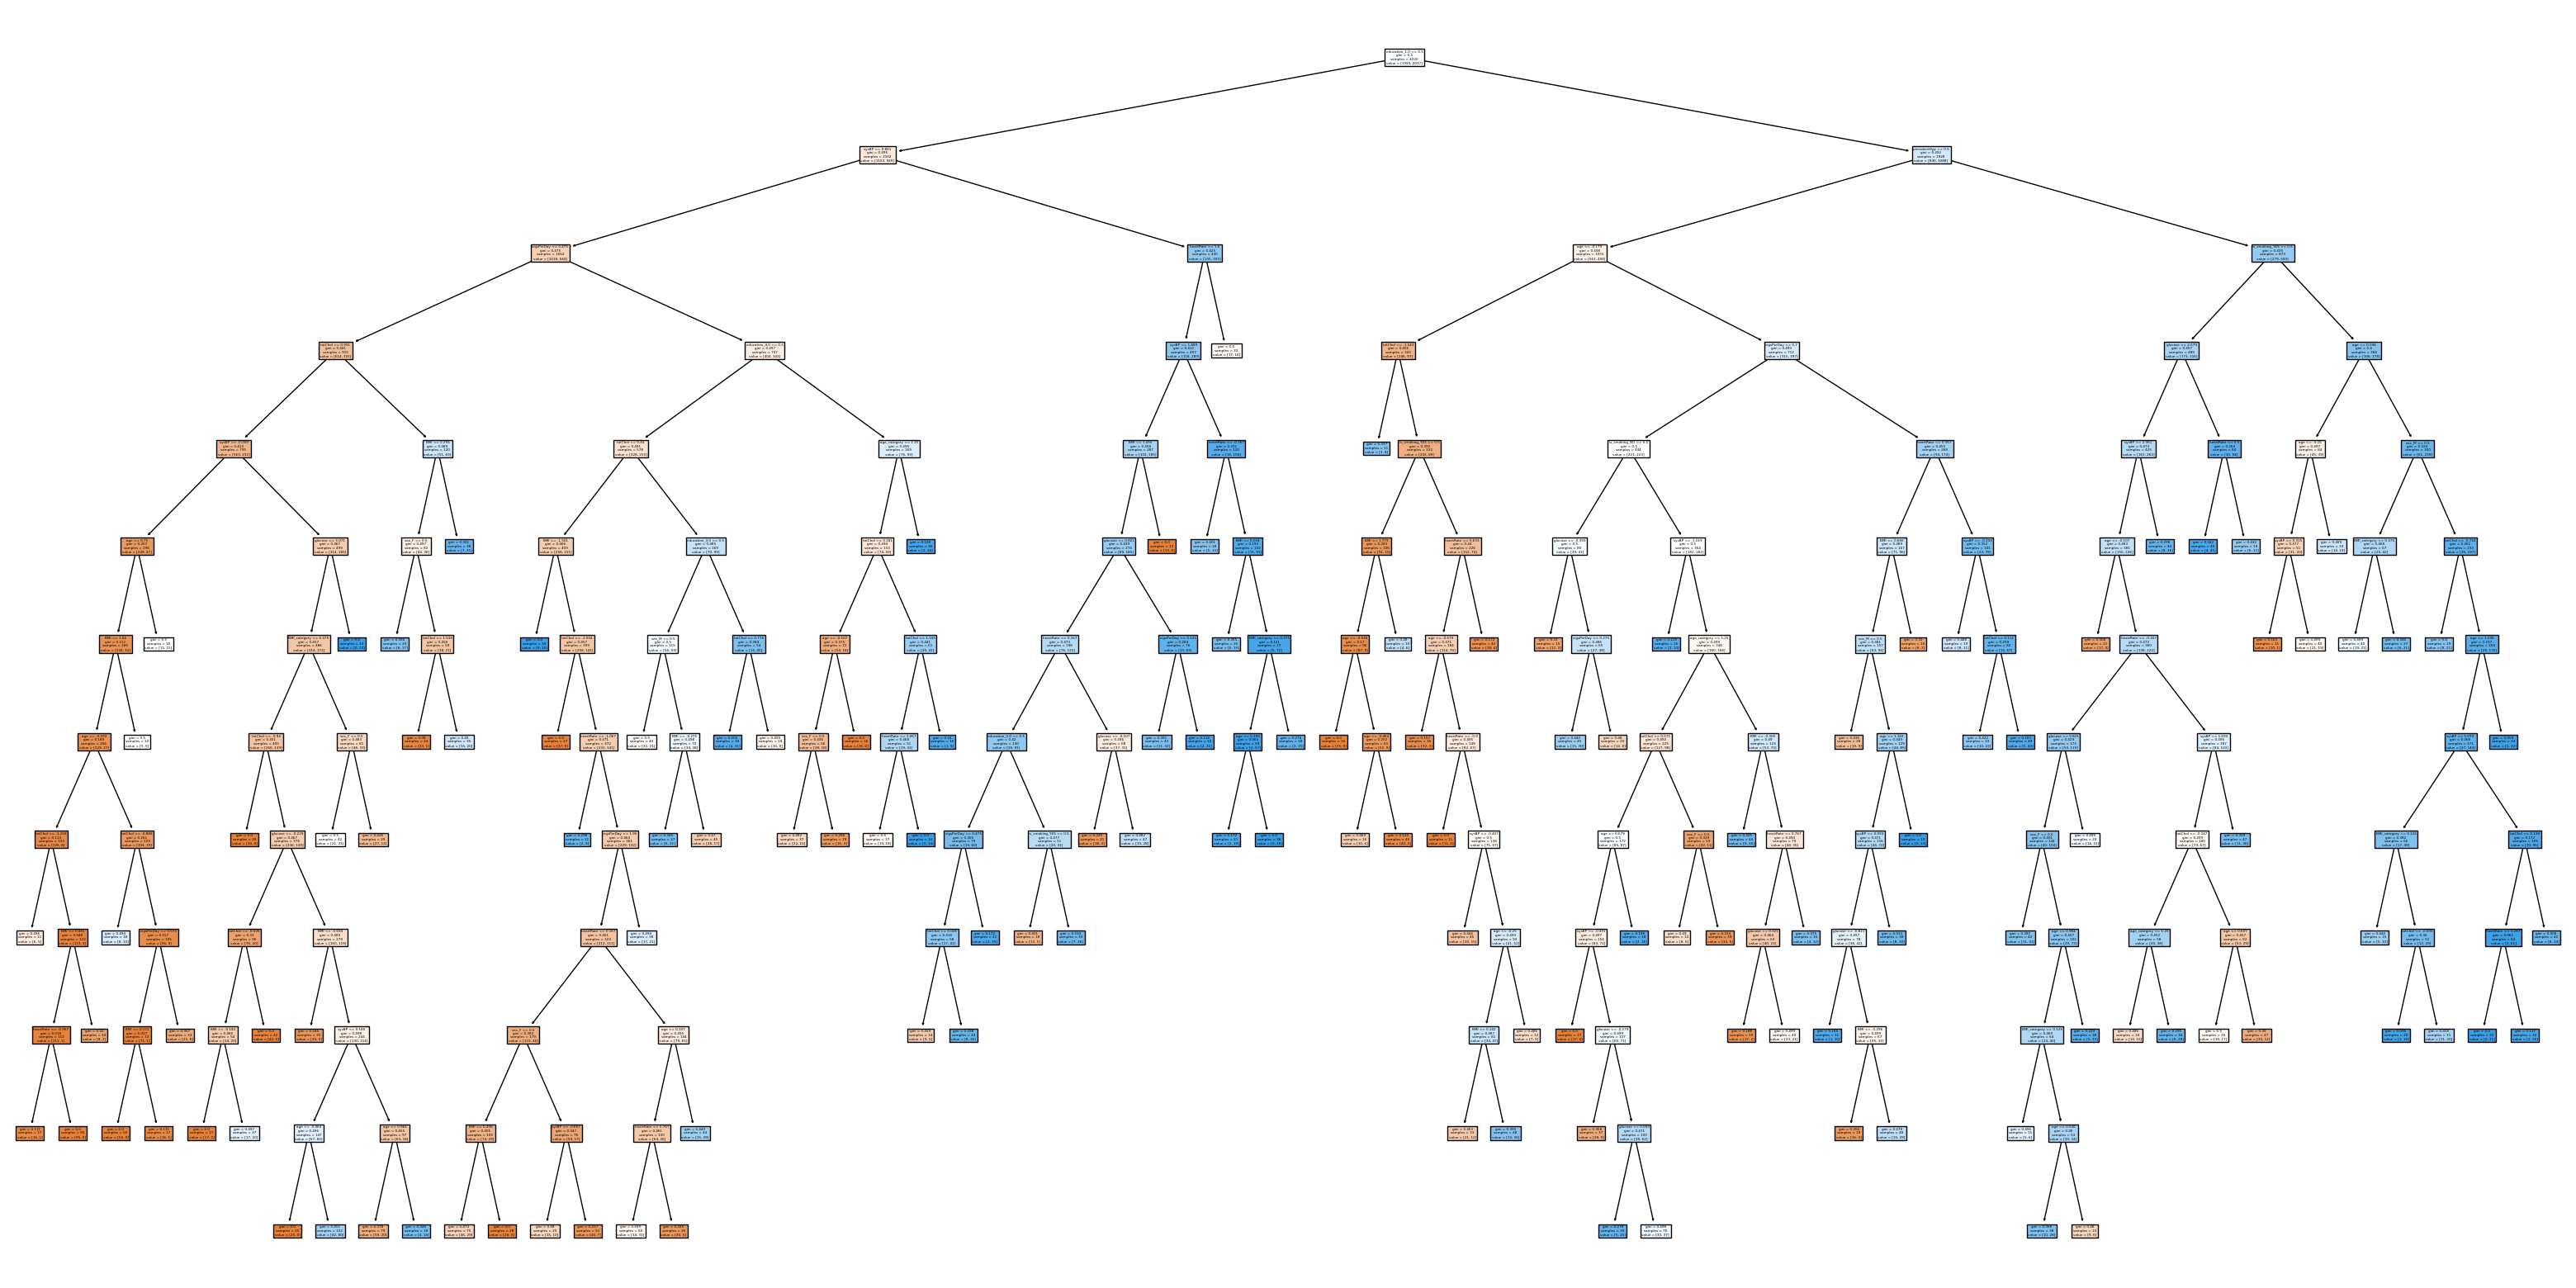

DecisionTreeClassifier(max_depth=12, max_features=5, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

In [46]:
decision_tree_over.define_best_model(param_over)

In [47]:
dt_over_results = decision_tree_over.apply_best_model('OVER Decision Tree Best')
dt_over_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.725694,0.712471,0.732779,0.722482,0.451421,test,OVER Decision Tree Best
1,0.756328,0.754954,0.766814,0.760838,0.512512,train,OVER Decision Tree Best


### DECISION TREE ON TOKEN_SMOTE DATAFRAME

-----


In [48]:
df_ts = pd.read_pickle('../data/cardio_processed_ts.pkl')
df_ts.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,...,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,is_smoking_NO,is_smoking_YES,sex_F,sex_M
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,...,0.142857,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,...,-0.214286,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,...,1.142857,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,...,1.142857,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,...,-0.071429,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [49]:
decision_tree_ts = Decision_Tree(df_ts, response_var)

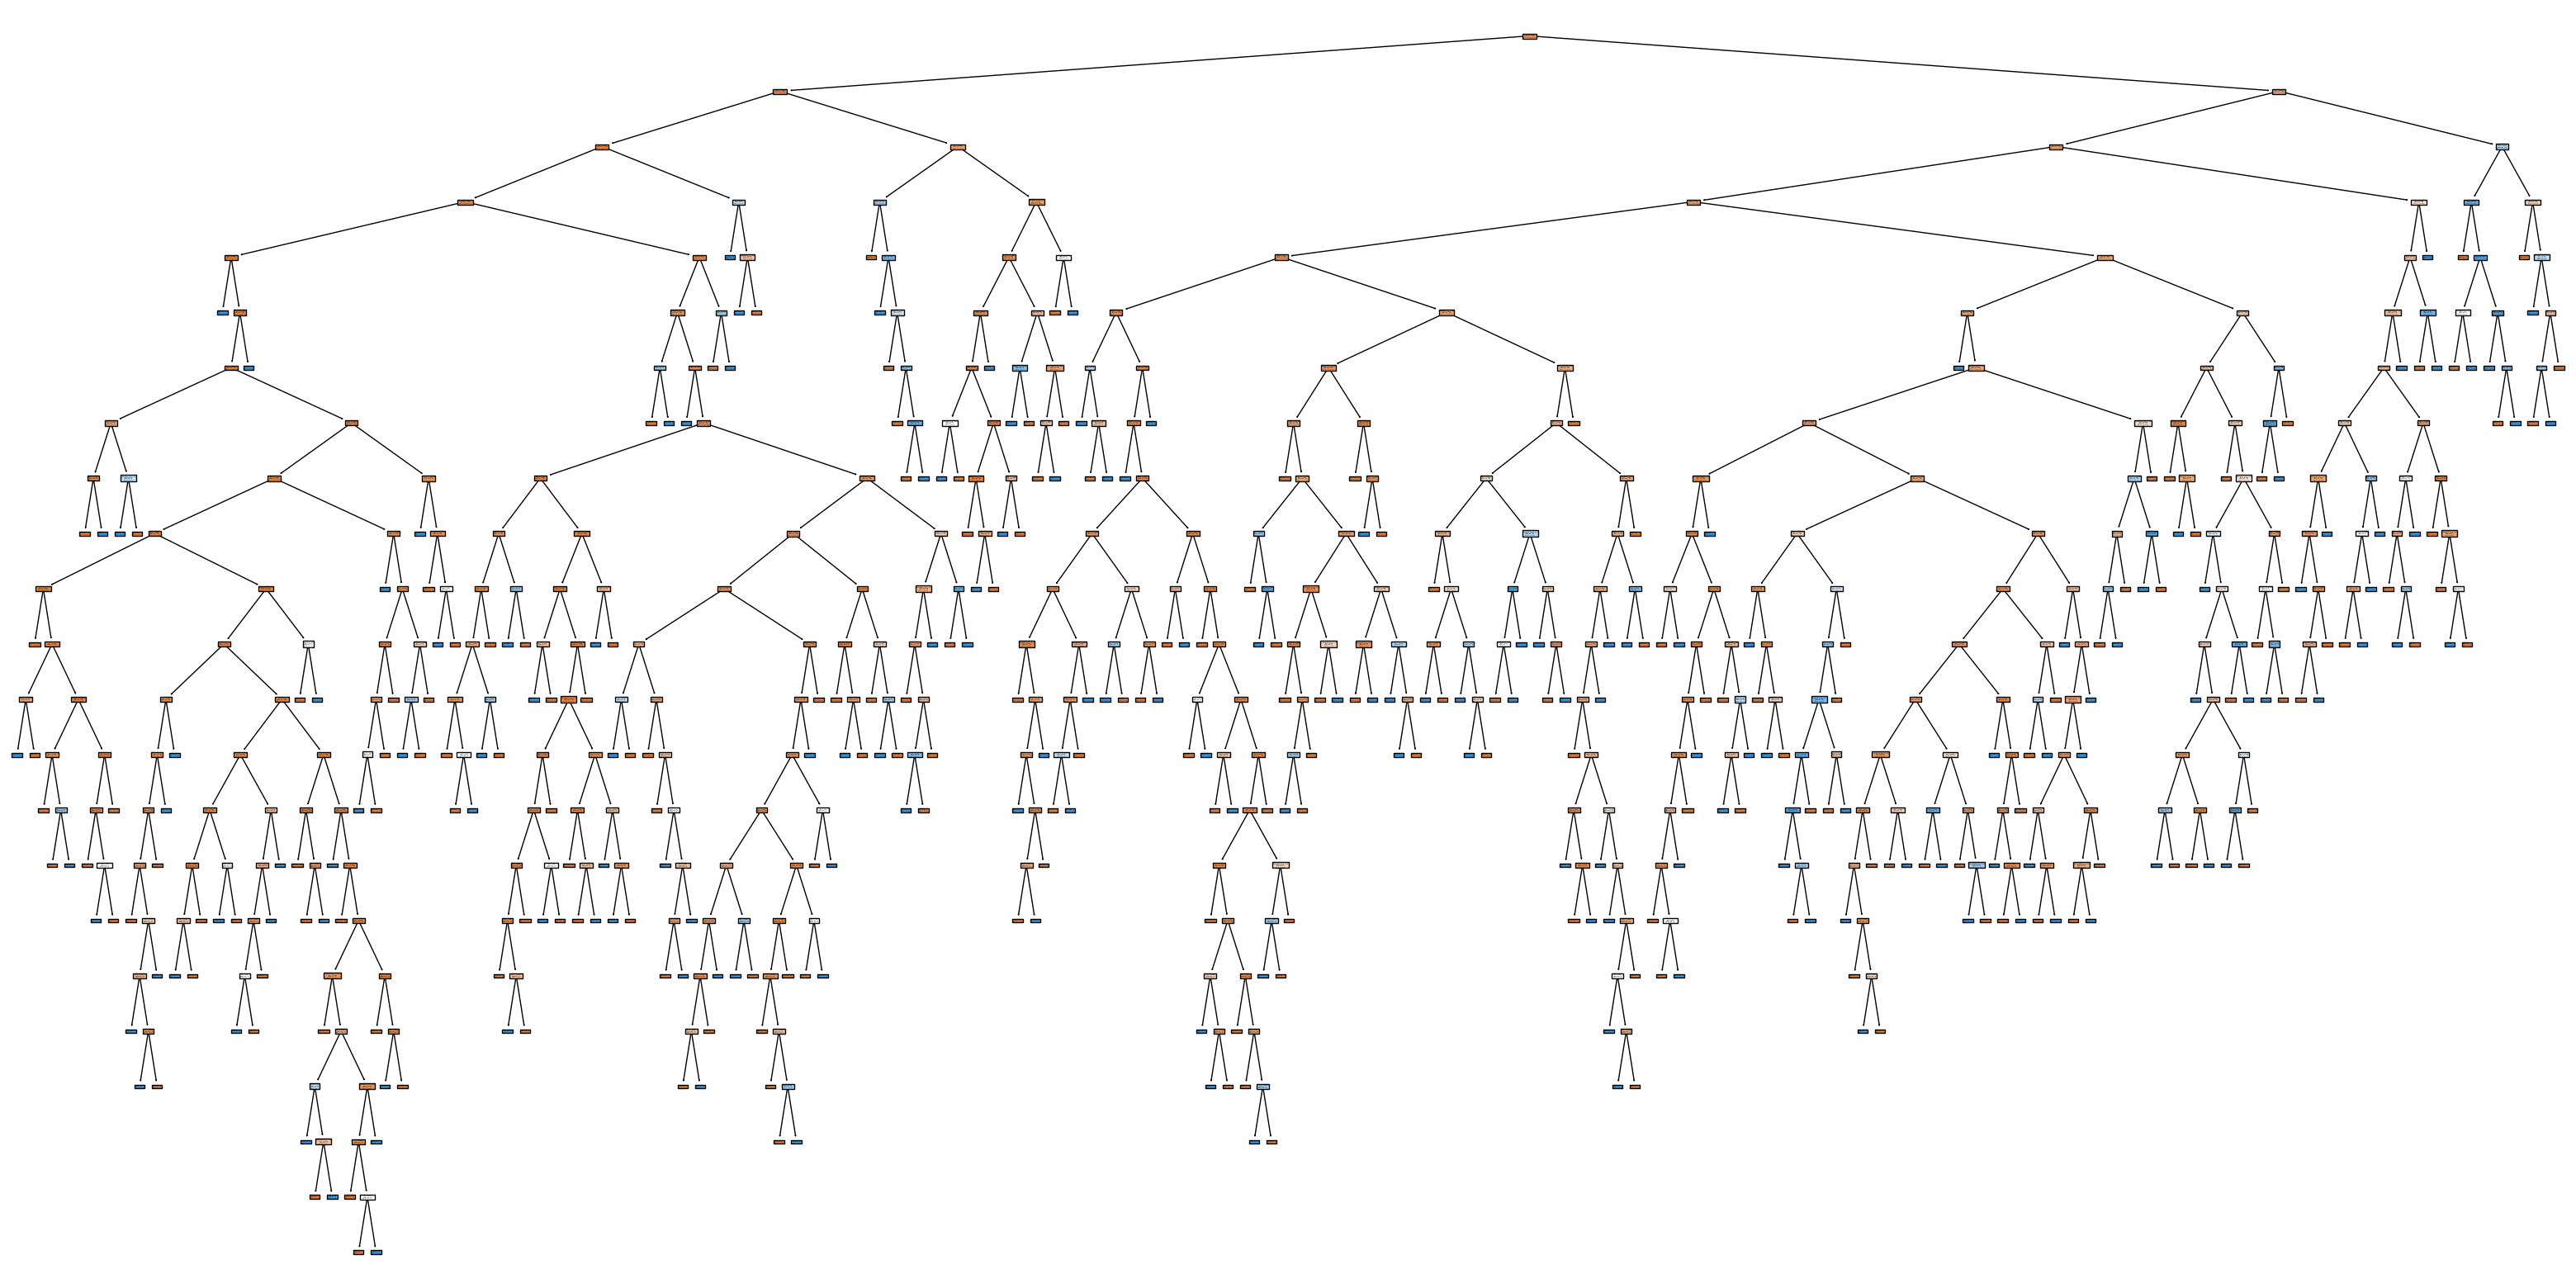

{'max_features': 4.58257569495584, 'max_depth': 22}

In [50]:
decision_tree_ts.fit_model()

In [51]:
decision_tree_ts.get_metrics('TS Decision Tree')

,accuracy,precision,recall,f1,kappa,set,model
0,0.769912,0.254335,0.295302,0.273292,0.137511,test,TS Decision Tree
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,TS Decision Tree


In [52]:
param_ts = {"max_depth": [9, 10, 11, 12], 
        "max_features": [2, 3, 4, 5],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [10, 20, 50]} 

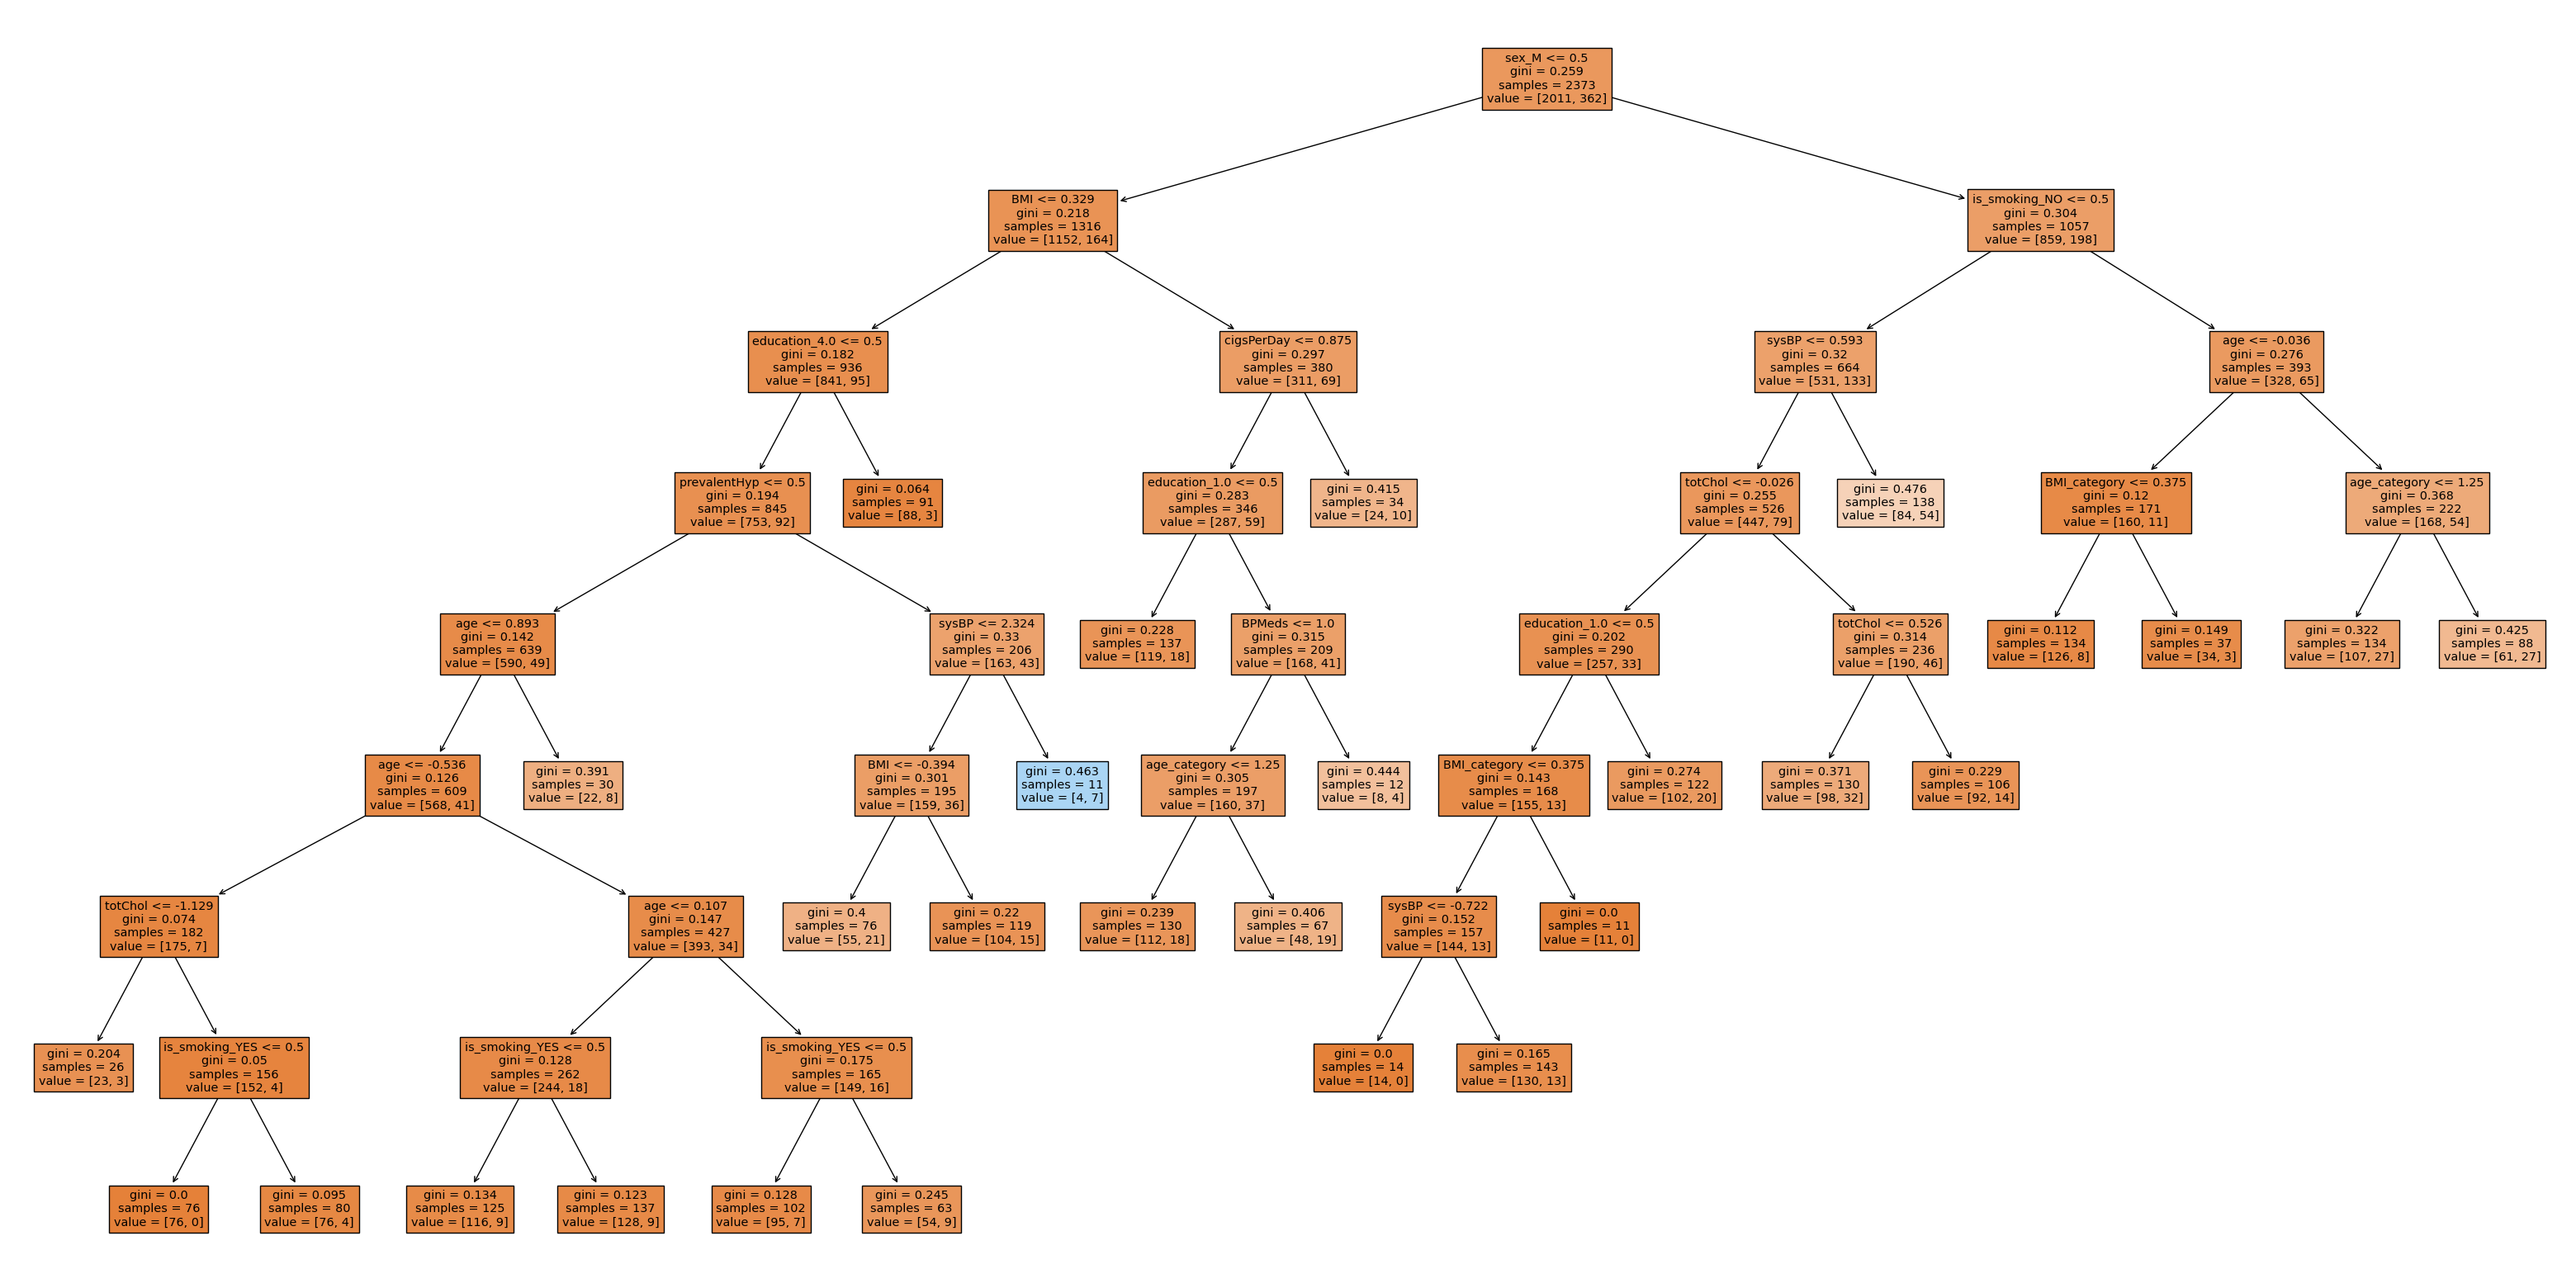

DecisionTreeClassifier(max_depth=11, max_features=3, min_samples_leaf=10,
                       min_samples_split=150, random_state=42)

In [53]:
decision_tree_ts.define_best_model(param_ts)

In [54]:
dt_ts_results = decision_tree_ts.apply_best_model('TS Decision Tree Best')
dt_ts_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.853491,0.500000,0.020134,0.038710,0.027681,test,TS Decision Tree Best
1,0.848715,0.636364,0.019337,0.037534,0.028795,train,TS Decision Tree Best


### SAVE RESULTS

-----


In [55]:
lr_results = pd.read_pickle('../data/LR_results.pkl')
lr_results.head()

,accuracy,precision,recall,f1,kappa,set,model
0,0.674190,0.665874,0.665083,0.665478,0.347938,test,OVER Logistic Regression
1,0.668734,0.669075,0.681885,0.675419,0.337250,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


In [56]:
all_results = pd.concat([lr_results, dt_over_results, dt_ts_results], axis = 0)
all_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.674190,0.665874,0.665083,0.665478,0.347938,test,OVER Logistic Regression
1,0.668734,0.669075,0.681885,0.675419,0.337250,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression
0,0.725694,0.712471,0.732779,0.722482,0.451421,test,OVER Decision Tree Best
1,0.756328,0.754954,0.766814,0.760838,0.512512,train,OVER Decision Tree Best
0,0.853491,0.500000,0.020134,0.038710,0.027681,test,TS Decision Tree Best
1,0.848715,0.636364,0.019337,0.037534,0.028795,train,TS Decision Tree Best


In [57]:
all_results.to_csv('../data/LR_DT_results.pkl')